Note: this notebook is set up to run with the env.yml containing the name 'polaris_datasets'

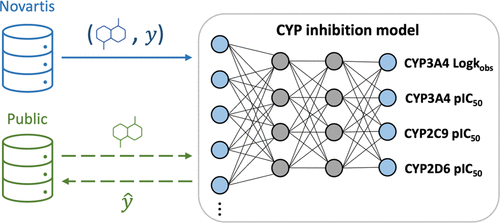

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import pandas as pd
import datamol as dm
import numpy as np

from polaris.cli import PolarisHubClient

# polaris dataset
from polaris.dataset import Dataset, ColumnAnnotation
from polaris.dataset._column import Modality

from polaris.utils.types import HubOwner


root = pathlib.Path("__file__").absolute().parents[2]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [3]:
org = "novatis"
data_name = "CYP"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"


In [8]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_DIR = f"{gcp_root}/datasets"
FIGURE_DIR =  f"{gcp_root}/figures"

## Load existing data


In [4]:
# Load the data
source_data_path = 'gs://polaris-public/polaris-recipes/org-novatis/CYP/data/curation/CYP_curated.csv'
data = pd.read_csv(source_data_path)

### Define `Dataset` object

In [5]:
version = "v1"
dataset_name = f"novatis_cyp3a4-{version}"

In [6]:
# Additional meta-data on the column level
annotations = {
    "MOL_smiles": ColumnAnnotation(
        description="Molecule SMILES string", modality="molecule"
    ),
    "log_kobs":  ColumnAnnotation(
        description="Log unit of TDI CYP3A4 inactivation.",
    ),
    "CLS_log_kobs": ColumnAnnotation(
        description="Three-class binning on TDI CYP3A4 inactivation  0.01 and 0.025.",
    ),
    "split": ColumnAnnotation(
        description="Train and test splitting from the original publication doi.org/10.1021/acs.chemrestox.3c00305",
    ),
}

In [7]:
dataset = Dataset(
    # The table is the core data-structure required to construct a dataset
    table=data[annotations.keys()],
    # Additional meta-data on the dataset level.
    name=dataset_name,
    description="CYP3A4 Time-Dependent Inhibition data released by Novartis",
    source="https://opendata.ncats.nih.gov/adme/data",
    annotations=annotations,
    tags=["ADME"],
    owner=HubOwner(user_id="Novartis", slug="novartis"),
    license="CC-BY-4.0",
    user_attributes={"year": "2024"},
    curation_reference="https://github.com/polaris-hub/polaris-recipes/org-Polaris/org-Novartis/CYP/00_CYP3A4_data_processing.ipynb",
)

In [9]:
# save the dataset to GCP
SAVE_DIR = f"{DATASET_DIR}/{dataset_name}"
dataset_path = dataset.to_json(SAVE_DIR)
dataset_path

'gs://polaris-public/polaris-recipes/org-novatis/CYP/datasets/novatis_cyp3a4-v1/dataset.json'

In [ ]:
# upload to Polaris Hub
# dataset.upload_to_hub(owner=owner, access="private")